In [1]:
import os

In [3]:
import gzip

In [4]:
import json

In [6]:
basedir = "/home/r/rcy-twitter/raw/home"
filenames = os.listdir(basedir)
filenames.sort()
all_tweets = []
for fn in filenames:
    print(str(len(all_tweets)) + " " + fn)
    with gzip.open(os.path.join(basedir, fn), "rb") as f:
        for line in f:
            t = json.loads(line.decode('utf-8').rstrip())
            all_tweets.append(t)


0 entity_tweets_1173.json.gz
1275 entity_tweets_1174.json.gz
3654 entity_tweets_1175.json.gz
3833 entity_tweets_1176.json.gz
3836 entity_tweets_1177.json.gz
3844 entity_tweets_1178.json.gz
3850 entity_tweets_1179.json.gz
3855 entity_tweets_1180.json.gz
3866 entity_tweets_1181.json.gz
4719 entity_tweets_1182.json.gz
7544 entity_tweets_1183.json.gz
10788 entity_tweets_1184.json.gz
13297 entity_tweets_1185.json.gz
17336 entity_tweets_1186.json.gz
17388 entity_tweets_1187.json.gz
17407 entity_tweets_1188.json.gz
21462 entity_tweets_1189.json.gz
23056 entity_tweets_1190.json.gz
26785 entity_tweets_1191.json.gz
28883 entity_tweets_1192.json.gz
30305 entity_tweets_1193.json.gz
30775 entity_tweets_1202.json.gz
30778 entity_tweets_1203.json.gz
33556 entity_tweets_1204.json.gz
34463 entity_tweets_1205.json.gz
36256 entity_tweets_1206.json.gz
37819 entity_tweets_1207.json.gz
42043 entity_tweets_1208.json.gz
42507 entity_tweets_1209.json.gz
46195 entity_tweets_1210.json.gz
49337 entity_tweets_1211

In [9]:
entity_tweets = all_tweets

In [10]:
import pickle

In [28]:
with open("entity_tweets.pickle", "wb") as f:
    pickle.dump(entity_tweets, f)

In [12]:
import datetime

In [16]:
for t in entity_tweets:
    created_at = datetime.datetime.strptime(t['created_at'], "%a %b %d %H:%M:%S +0000 %Y")
    t['created_at_dt'] = created_at

In [17]:
entity_tweets[-1]['created_at_dt']

datetime.datetime(2016, 5, 10, 19, 30, 57)

In [18]:
import numpy
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

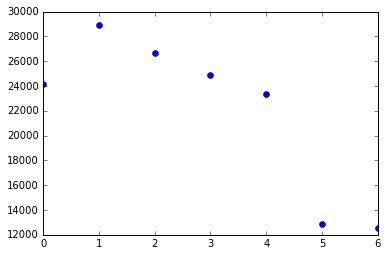

In [26]:
day_dist = numpy.zeros(7)
for t in entity_tweets:
    w = t['created_at_dt'].weekday()
    day_dist[w] += 1
plt.plot([i for i in range(7)], day_dist, 'bo')

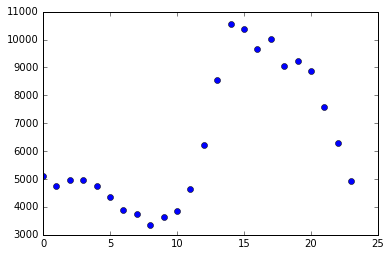

In [25]:
hour_dist = numpy.zeros(24)
for t in entity_tweets:
    h = t['created_at_dt'].hour
    hour_dist[h] += 1
plt.plot([i for i in range(24)], hour_dist, 'bo')

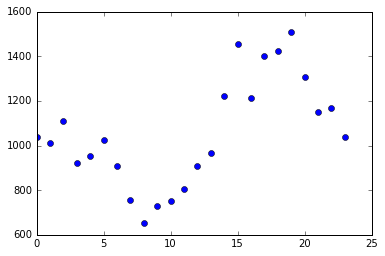

In [24]:
# what about weekends?
hour_dist = numpy.zeros(24)
for t in entity_tweets:
    if t['created_at_dt'].weekday() > 4:
        h = t['created_at_dt'].hour
        hour_dist[h] += 1
plt.plot([i for i in range(24)], hour_dist, 'bo')

In [27]:
import textblob

In [29]:
tb = textblob.TextBlob(entity_tweets[0]['text'])

In [30]:
import sys

In [31]:
sys.getsizeof(tb)

56

In [34]:
tb.sentiment

Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)

In [35]:
tb.sentences

[Sentence("Apple's Currency Index Turns A New Page In Its Financial Results https://t.co/MpxLNu2Mrw $UUP $AAPL")]

In [37]:
tb.sentences[0].sentiment

Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)

In [33]:
sys.getsizeof(tb.sentiment)

64

In [38]:
for t in entity_tweets:
    tb = textblob.TextBlob(t['text'])
    t['sentiment.polarity'] = tb.sentiment.polarity
    t['sentiment.subjectivity'] = tb.sentiment.subjectivity
    t['lensentences'] = len(tb.sentences)
    

In [49]:
origin_day = entity_tweets[0]['created_at_dt'].toordinal()
sum_daily_polarity = numpy.zeros(entity_tweets[-1]['created_at_dt'].toordinal() - origin_day + 1)
sumsq_daily_polarity = numpy.zeros(entity_tweets[-1]['created_at_dt'].toordinal() - origin_day + 1)
count_daily_tweets = numpy.zeros(entity_tweets[-1]['created_at_dt'].toordinal() - origin_day + 1)
for t in entity_tweets:
    dtidx = t['created_at_dt'].toordinal() - origin_day
    sum_daily_polarity[dtidx] += t['sentiment.polarity']
    sumsq_daily_polarity[dtidx] += t['sentiment.polarity'] * t['sentiment.polarity']
    count_daily_tweets[dtidx] += 1

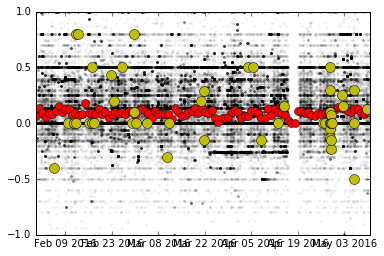

In [62]:
plt.plot([x['created_at_dt'] for x in entity_tweets], [x['sentiment.polarity'] for x in entity_tweets], 'ko',
         markersize=2, alpha=0.05)
plt.plot([datetime.datetime.fromordinal(origin_day + i) for i in range(len(sum_daily_polarity))],
         [sum_daily_polarity[i] / (1 + count_daily_tweets[i]) for i in range(len(sum_daily_polarity))], 'ro', markersize=8)
plt.plot([x['created_at_dt'] for x in icahn], [x['sentiment.polarity'] for x in icahn], 'yo', markersize=10)

In [57]:
[sum_daily_polarity[i] / (1 + count_daily_tweets[i]) for i in range(len(sum_daily_polarity))]

[0.061416012255544598,
 0.13266114486633354,
 0.086985691799664366,
 0.057602601275796188,
 0.094996691745203685,
 0.084933523902755978,
 0.10974583529397886,
 0.14995943183225618,
 0.10298789189069228,
 0.13145070222959787,
 0.12289023624570738,
 0.075024558652840953,
 0.094809768801145444,
 0.077182070827773411,
 0.084457878477841281,
 0.17792023490289449,
 0.088281400158405604,
 0.095784631883192098,
 0.081027538713133312,
 0.12604813503761042,
 0.085691181637977037,
 0.098332118107435876,
 0.04636687580717197,
 0.084258737569394906,
 0.095993744475316084,
 0.092174701122488878,
 0.10021088160551894,
 0.086730437127266954,
 0.10566867950689816,
 0.096731108347128433,
 0.072278093313239811,
 0.11410094538639121,
 0.12972572369189855,
 0.11091472837037882,
 0.090948324187171734,
 0.043899995099727002,
 0.10710024917532614,
 0.08533997218066075,
 0.085932664397666558,
 0.080607949983529076,
 0.079129106311672595,
 0.035003911975491651,
 0.13218652267870981,
 0.097646355440502722,
 0.06

In [58]:
entity_tweets[-1]['text']

"Just found out about 'watch'  command on Linux. \nNeed to continually monitor your input device? $watch -n0 'xinput query-status device'. \\o/"

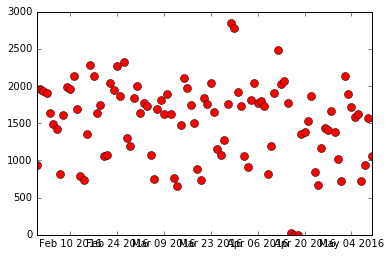

In [53]:
# plt.plot([x['created_at_dt'] for x in entity_tweets], [x['sentiment.polarity'] for x in entity_tweets], 'ko', markersize=2, alpha=0.05)
plt.plot([datetime.datetime.fromordinal(origin_day + i) for i in range(len(sum_daily_polarity))],
         [(1 + count_daily_tweets[i]) for i in range(len(sum_daily_polarity))], 'ro', markersize=8)

In [59]:
uber = []
for t in entity_tweets:
    if 'uber' in t['text'].lower():
        uber.append(t)
        print(t['text'])

RT @notagoodboi: My uber pool driver is freestyling. I woulda recorded but he asked me not to $HUSTLE 🇺🇸
Facebook working on ride-sharing feature to help friends get to your party $FB #Uber https://t.co/tNAahn6anC
Rodrigo Melo: Um doce pra quem $ouber o porquê? https://t.co/XrixMC3XIc
NextGenVest CEO On What Fintech Startups Can Learn From Uber☄ #vrai777 ⛱ $v #tech ⛱ #crunch https://t.co/WuAqLlCA6t
RT @Clivebarron: @FilmProfessor9 @Kelly_Evans @michaelsantoli @CNBCClosingBell  LOL Uber now at 62 billion. @Sacca involved in this scam to…
Uber drivers plan ‘Super Bowl’ protest #tech ☄ #vrai777 ⛱ $v #ℑnnovate https://t.co/EBKviZTS3Y
@businessinsider @bizcarson uber over a hertz too? $htz $car
#Amazon ( $AMZN) And Uber Apt To Spur Strong Food-Delivery Traffic. Read more: https://t.co/8s86OtgT85
#MercuryInsurance ( $MCY) Launches Ride-Hailing Insurance For Nevada's Uber &amp; Lyft Drivers. Read more: https://t.co/wRf9bKUKgw
@ubernauten Gibt’s bei euch ne Möglichkeit, Greylisting zu machen? 

In [60]:
len(uber)

152

In [61]:
len(count_daily_tweets)

101

In [47]:
sp = sum([x['sentiment.polarity'] for x in entity_tweets]) / len(entity_tweets)
sp2 = sum([x['sentiment.polarity'] * x['sentiment.polarity'] for x in entity_tweets]) / len(entity_tweets)
(sp, sp2, (sp2 - sp * sp)**0.5)

(0.09491035945352284, 0.06579219181190897, 0.2382943882686121)

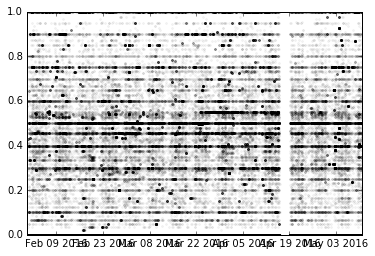

In [44]:
plt.plot([x['created_at_dt'] for x in entity_tweets], [x['sentiment.subjectivity'] for x in entity_tweets], 'ko', markersize=2, alpha=0.05)

In [48]:
sp = sum([x['sentiment.subjectivity'] for x in entity_tweets]) / len(entity_tweets)
sp2 = sum([x['sentiment.subjectivity'] * x['sentiment.subjectivity'] for x in entity_tweets]) / len(entity_tweets)
(sp, sp2, (sp2 - sp * sp)**0.5)

(0.2664994266391375, 0.16578222626652528, 0.30783158036097635)